# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting my data

In [2]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv')
submit_format = pd.read_csv('submission_format.csv')

# Analysis/Modeling

## Analyse training data

#### Get the shape of the training data

In [3]:
print(train_values.shape)
print(train_labels.shape)

(500000, 22)
(500000, 2)


#### Check for missing data in the training value and labels

In [4]:
train_values.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [5]:
train_values

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False
5,5,1,1,3,1,133.0,3,221,13,55,...,2,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False
6,6,3,1,1,1,240.0,3,374,28,131,...,2,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False
7,7,2,1,1,1,210.0,3,322,37,35,...,1,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True
8,8,1,1,3,2,209.0,3,24,37,20,...,1,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True
9,9,1,1,3,1,197.0,3,194,9,20,...,1,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False


In [6]:
train_labels

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,0


In [7]:
# Minimum loan amount
train_values['loan_amount'].min()

# Maximum loan amount
train_values['loan_amount'].max()

# Mean loan amount
train_values['loan_amount'].mean()

# Median loan amount
train_values['loan_amount'].median()

# Standard deviation of the loan amount
train_values['loan_amount'].std()

590.6416481879309

(array([136467., 167760.,  95379.,  47291.,  23422.,  10485.,   6606.,
          3194.,   1994.,   1828.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

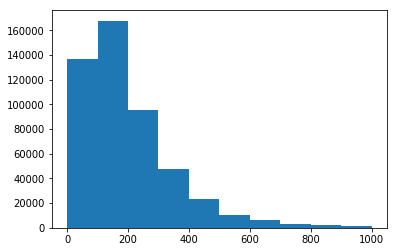

In [8]:
# Plot an histogram of loan amount
plt.hist(train_values['loan_amount'], range=(0,1000))

In [9]:
train_data = pd.merge(train_labels, train_values, on='row_id')
train_data

,row_id,accepted,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,1,3,1,1,1,70.0,3,18,37,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,0,1,1,3,1,178.0,3,369,52,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,1,2,1,3,1,163.0,3,16,10,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,1,155.0,1,305,47,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,1,305.0,3,24,37,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False
5,5,1,1,1,3,1,133.0,3,221,13,...,2,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False
6,6,1,3,1,1,1,240.0,3,374,28,...,2,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False
7,7,1,2,1,1,1,210.0,3,322,37,...,1,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True
8,8,1,1,1,3,2,209.0,3,24,37,...,1,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True
9,9,0,1,1,3,1,197.0,3,194,9,...,1,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False


In [10]:
train_data.shape

(500000, 23)

In [11]:
ae4 = train_data[train_values['applicant_ethnicity']==4]
ae2 = train_data[train_values['applicant_ethnicity']==1]
as1 = train_data[train_values['applicant_sex']==1]
as2 = train_data[train_values['applicant_sex']==2]

# fig = plt.figure()
# fig, axes = plt.subplots(nrows=1, ncols=2)

# axes.plot(ae4)
# axes.plot(ae2)

# fig
# plt.show()

In [12]:
ae4['accepted'].mean()

0.789310878157759

In [13]:
ae2['accepted'].mean()

0.427413324938019

In [14]:
as1['accepted'].mean()

0.520822910267696

In [15]:
as2['accepted'].mean()

0.46645342814748453

In [16]:
l45 = train_values[train_values['state_code']==45]
l45.shape

(4638, 22)

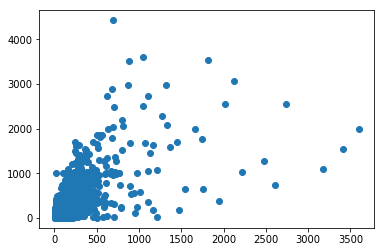

In [17]:
l45i = l45['applicant_income']
l45l = l45['loan_amount']

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.plot(l45i)
# ax.plot(l45l)

# ax.legend

plt.scatter(l45i, l45l)


In [18]:
l45i.corr(l45l)

0.6299807976879394

In [19]:
sc48 = train_data[train_values['state_code']==48]
sc48.shape

(15761, 23)

In [20]:
# remove -1
sc48 = sc48[sc48['county_code']!=-1]
print(sc48.shape)

# group sc48 by county_code and find the mean of the rest column
grouped_sc48 = sc48.groupby(['county_code']).mean()
grouped_sc48.head(5)

(15711, 23)


,row_id,accepted,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
county_code,,,,,,,,,,,,,,,,,,,,,
2,222146.044118,0.455882,1.485294,1.117647,1.985294,1.014706,92.250000,2.897059,42.00000,48.0,...,1.397059,75.125000,5556.838235,3.937118,66198.558824,94.937632,1792.779412,2293.323529,4022.955882,0.367647
3,231564.684211,0.513158,1.486842,1.250000,1.921053,1.052632,96.684211,2.802632,-1.00000,48.0,...,1.552632,66.885714,4852.133333,5.849973,60003.413333,94.113707,1489.106667,2009.560000,2813.092105,0.394737
10,255780.027397,0.643836,1.246575,1.109589,1.958904,1.150685,147.986301,2.931507,149.90411,48.0,...,1.452055,96.521739,4997.750000,13.602139,77395.319444,92.599194,1318.958333,1916.138889,4291.821918,0.465753
11,297929.975610,0.390244,1.341463,1.292683,1.853659,1.268293,56.951220,2.951220,-1.00000,48.0,...,1.365854,54.243902,3997.243902,3.654927,60094.585366,91.285878,1229.024390,2189.439024,2261.536585,0.414634
14,249040.650000,0.450000,1.258333,1.025000,2.083333,1.075000,304.466667,2.841667,275.00000,48.0,...,1.416667,133.577982,5738.133333,16.195833,95476.875000,99.872142,1655.133333,1957.016667,4128.500000,0.391667


0.3150684931506849
0.6666666666666666


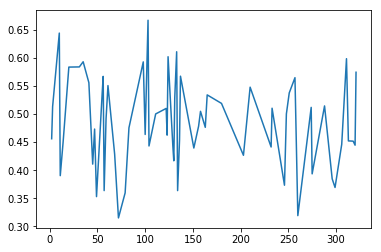

In [21]:
# plot the mean of the accepted value
plt.plot(grouped_sc48['accepted'])
print(grouped_sc48['accepted'].min())
print(grouped_sc48['accepted'].max())

In [22]:
# filter state_code 2&4
sc2and4 = train_data[(train_data['state_code']==2) | (train_data['state_code']==4)]
sc2and4.shape

# get the overall acceptance rate
overallA2and4 = sc2and4['accepted'].mean()
print(overallA2and4)

# For each loan try get acceptance rate
sc2 = train_data[train_data['state_code']==2]
sc4 = train_data[train_data['state_code']==4]

grouped_sc2 = sc2.groupby('loan_type').mean()
grouped_sc4 = sc4.groupby('loan_type').mean()

print(grouped_sc2['accepted'])
print(grouped_sc4['accepted'])

0.4903343840236295
loan_type
1    0.435804
2    0.503708
3    0.531802
4    0.461240
Name: accepted, dtype: float64
loan_type
1    0.569992
2    0.554178
3    0.639456
4    0.617647
Name: accepted, dtype: float64


# Machine learning

## Data type

In [23]:
train_values.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

## Clean your data

In [24]:
# Create an array called rows_to_delete
train_data_without_missing_value = train_data

# Create a variable for int column and float column
int_column = []
float_column = []
bool_column = []

for column in train_data.columns:
    if(train_data[column].dtypes == 'int'):
        int_column.append(column)
    elif(train_data[column].dtypes == 'float'):
        float_column.append(column)
    else:
        bool_column.append(column)
        
print(int_column)
print(float_column)
print(bool_column)

['row_id', 'accepted', 'loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'msa_md', 'state_code', 'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'lender']
['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
['co_applicant']


In [25]:
# Store the row_id of every column with '-1'or NaN
# Delete rows with -1
for column in int_column:
    train_data_without_missing_value = train_data_without_missing_value[train_data[column] != -1]
    
print(train_data_without_missing_value.shape)

# Delete rows with NaN
train_data_without_missing_value.dropna(inplace=True)

# Fill numerical data with mean
# train_data_without_missing_value = train_data_without_missing_value.groupby(train_data_without_missing_value.columns, axis=1).transform(lambda x: x.fillna(x.mean()))
    
print(train_data_without_missing_value.shape)

/home/igori/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/igori/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/igori/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/igori/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/igori/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/igori/.local/lib/python3.7/site-packages/ipykernel_lau

(423018, 23)
(387163, 23)


In [26]:
# Remove the row ID
# train_data.drop('')
train_data_without_missing_value.isnull().sum()
# Remove missing data

row_id                            0
accepted                          0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
dtype: int64

In [27]:
# OHE to category data
# train model
print(train_data_without_missing_value.head(5))

   row_id  accepted  loan_type  property_type  loan_purpose  occupancy  \
0       0         1          3              1             1          1   
1       1         0          1              1             3          1   
2       2         1          2              1             3          1   
3       3         1          1              1             1          1   
4       4         1          1              1             1          1   

   loan_amount  preapproval  msa_md  state_code  ...  applicant_sex  \
0         70.0            3      18          37  ...              1   
1        178.0            3     369          52  ...              1   
2        163.0            3      16          10  ...              1   
3        155.0            1     305          47  ...              1   
4        305.0            3      24          37  ...              2   

   applicant_income  population  minority_population_pct  \
0              24.0      6203.0                   44.230   
1       

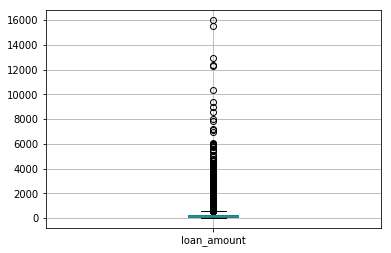

In [28]:
visualize_outliers_int_small = ['accepted', 'loan_type', 'property_type', 'loan_purpose', 'occupancy']
train_data_without_missing_value.boxplot(column='loan_amount')

In [29]:
sns.set(style='whitegrid')
# visualized_data = sns.load_dataset(train_data_without_missing_value)
g = sns.JointGrid(x='loan_amount', y='applicant_income', data=train_data_without_missing_value)
g = g.plot(sns.regplot, sns.distplot)

SyntaxError: invalid syntax (<ipython-input-29-3664504cbf9b>, line 1)

In [30]:
train_data_without_missing_value['applicant_income'].corr(train_data_without_missing_value['loan_amount'])

0.48079094718783655

15983.0


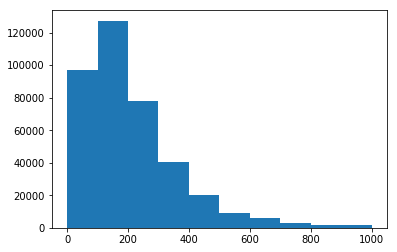

In [31]:
plt.hist(train_data_without_missing_value['loan_amount'], range=(0,1000))
print(train_data_without_missing_value['loan_amount'].max())

10139.0


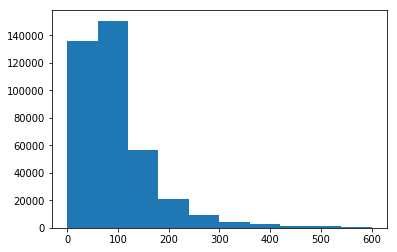

In [32]:
plt.hist(train_data_without_missing_value['applicant_income'], range=(0,600))
print(train_data_without_missing_value['applicant_income'].max())

In [34]:
minus_outliers = train_data[train_data['applicant_income']<1000]
# minus_outliers = train_data_without_missing_value[train_data_without_missing_value['applicant_income']<1000]

# minus_outliers = minus_outliers[minus_outliers['applicant_income']<600]
minus_outliers.shape

(458660, 23)

In [ ]:
minus_outliers['applicant_income'].corr(minus_outliers['loan_amount'])

In [ ]:
g = sns.JointGrid(x='loan_amount', y='applicant_income', data=minus_outliers)
g = g.plot(sns.regplot, sns.distplot)

In [ ]:
sns.boxplot(x='loan_amount', data=minus_outliers)

In [ ]:
sns.heatmap(train_data_without_missing_value.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Machine Learning Hurray 🎊

## Import Machine learning libraries

In [ ]:
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm

## Remove irrelevant columns

In [ ]:
minus_outliers.head(10)

In [ ]:
train_data_without_missing_value.head()

In [ ]:
minus_outliers = minus_outliers.reset_index()

In [ ]:
# train_data_without_missing_value = train_data_without_missing_value.reset_index()

In [ ]:
minus_outliers.head()

In [ ]:
test = minus_outliers['accepted']
# test = train_data_without_missing_value['accepted']

In [ ]:
test.unique()

In [ ]:
test[200144]

In [ ]:
train = minus_outliers.drop(columns=['index','row_id','accepted'])
# train = train_data_without_missing_value.drop(columns=['index','row_id','accepted','state_code', 'msa_md'])
train

In [ ]:
cat_col = list(train.columns)
cat_col

In [ ]:
train_int = []
train_float = []
train_bool = []

for column in train.columns:
    if(train[column].dtypes == 'int'):
        train_int.append(column)
    elif(train_data[column].dtypes == 'float'):
        train_float.append(column)
    else:
        train_bool.append(column)
        
print(train_int)
print(train_float)
print(train_bool)

In [ ]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()


Features = encode_string(train['co_applicant'])

for column in train_int:
    temp = encode_string(train[column])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

In [ ]:
Features = np.concatenate([Features, np.array(train[train_float])], axis = 1)
print(Features.shape)
print(Features[:2, :])  

In [ ]:
train.shape

In [ ]:
Features.shape

In [ ]:
test[200144]

In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(test[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(test[indx[1]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[:,34:])
X_train[:,34:] = scaler.transform(X_train[:,34:])
X_test[:,34:] = scaler.transform(X_test[:,34:])
X_train[:2,]

In [ ]:
y_train

In [ ]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

In [ ]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

In [ ]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

encode categorical name(co_applicant)